This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6907 - loss: 1.1090 - val_accuracy: 0.8961 - val_loss: 0.3307
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9140 - loss: 0.2772 - val_accuracy: 0.9392 - val_loss: 0.2033
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9458 - loss: 0.1770 - val_accuracy: 0.9553 - val_loss: 0.1610
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9601 - loss: 0.1277 - val_accuracy: 0.9561 - val_loss: 0.1433
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9718 - loss: 0.0906 - val_accuracy: 0.9603 - val_loss: 0.1405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9799 - loss: 0.0635 - val_accuracy: 0.9607 - val_loss: 0.1332
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9854 - loss: 0.0486 - val_accuracy: 0.9646 - val_loss: 0.1289
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accu

**Plotting a validation accuracy comparison**

In [12]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_ori = history_ori.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_noise, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

NameError: name 'history_ori' is not defined

In [14]:
model_ori = build_model()  # 모델 구조는 기존과 동일하다고 가정
history_ori = model_ori.fit(
    x_train_ori, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(x_val_ori, y_val)
)


NameError: name 'x_train_ori' is not defined

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1018 - loss: 2.3302 - val_accuracy: 0.1011 - val_loss: 2.3044
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1160 - loss: 2.2976 - val_accuracy: 0.0988 - val_loss: 2.3148
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1291 - loss: 2.2885 - val_accuracy: 0.1061 - val_loss: 2.3143
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1451 - loss: 2.2760 - val_accuracy: 0.1011 - val_loss: 2.3263
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1515 - loss: 2.2599 - val_accuracy: 0.1029 - val_loss: 2.3361
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1702 - loss: 2.2371 - val_accuracy: 0.0954 - val_loss: 2.3544
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1884 - loss: 2.2127 - val_accuracy: 0.0992 - val_loss: 2.3697
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2028 - loss: 2.1850 - val_accu

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [16]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4353 - loss: 3853.6729 - val_accuracy: 0.2093 - val_loss: 2.0937
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1965 - loss: 2.5791 - val_accuracy: 0.1441 - val_loss: 2.3522
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1733 - loss: 2.5703 - val_accuracy: 0.2387 - val_loss: 2.3007
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1977 - loss: 2.3445 - val_accuracy: 0.1773 - val_loss: 2.2959
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1677 - loss: 2.4638 - val_accuracy: 0.1385 - val_loss: 2.2759
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1594 - loss: 2.3871 - val_accuracy: 0.1313 - val_loss: 2.4348
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1598 - loss: 2.3470 - val_accuracy: 0.1802 - val_loss: 2.3039
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1745 - loss: 2.3429 - val_accuracy:

**The same model with a more appropriate learning rate**

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8340 - loss: 0.9124 - val_accuracy: 0.9582 - val_loss: 0.1470
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9642 - loss: 0.1236 - val_accuracy: 0.9628 - val_loss: 0.1443
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9740 - loss: 0.0936 - val_accuracy: 0.9630 - val_loss: 0.1629
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9809 - loss: 0.0719 - val_accuracy: 0.9708 - val_loss: 0.1407
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9844 - loss: 0.0613 - val_accuracy: 0.9724 - val_loss: 0.1603
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9857 - loss: 0.0542 - val_accuracy: 0.9743 - val_loss: 0.1651
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9880 - loss: 0.0532 - val_accuracy: 0.9732 - val_loss: 0.1932
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9884 - loss: 0.0502 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [18]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7398 - loss: 1.0345 - val_accuracy: 0.9047 - val_loss: 0.3587
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9009 - loss: 0.3671 - val_accuracy: 0.9154 - val_loss: 0.3088
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.3234 - val_accuracy: 0.9185 - val_loss: 0.2918
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.2999 - val_accuracy: 0.9225 - val_loss: 0.2830
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.3001 - val_accuracy: 0.9240 - val_loss: 0.2802
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9209 - loss: 0.2842 - val_accuracy: 0.9255 - val_loss: 0.2730
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9235 - loss: 0.2730 - val_accuracy: 0.9255 - val_loss: 0.2710
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.2713 - val_accuracy: 0.

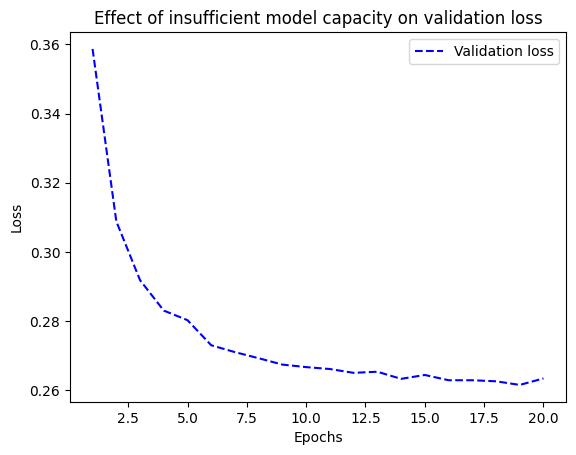

In [19]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [20]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8257 - loss: 0.6381 - val_accuracy: 0.9383 - val_loss: 0.2045
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9466 - loss: 0.1784 - val_accuracy: 0.9592 - val_loss: 0.1390
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9645 - loss: 0.1220 - val_accuracy: 0.9640 - val_loss: 0.1174
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0914 - val_accuracy: 0.9686 - val_loss: 0.1032
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0750 - val_accuracy: 0.9706 - val_loss: 0.1007
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0596 - val_accuracy: 0.9712 - val_loss: 0.0994
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0475 - val_accuracy: 0.9700 - val_loss: 0.1057
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0376 - val_accuracy: 0.

과적합된 버전에선 그래프가 상승

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [21]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6773 - loss: 0.6218 - val_accuracy: 0.8249 - val_loss: 0.4453
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8763 - loss: 0.3805 - val_accuracy: 0.8801 - val_loss: 0.3312
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9135 - loss: 0.2705 - val_accuracy: 0.8831 - val_loss: 0.2994
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9311 - loss: 0.2170 - val_accuracy: 0.8847 - val_loss: 0.2858
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9442 - loss: 0.1775 - val_accuracy: 0.8791 - val_loss: 0.3000
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9522 - loss: 0.1507 - val_accuracy: 0.8886 - val_loss: 0.2806
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9615 - loss: 0.1260 - val_accuracy: 0.8869 - val_loss: 0.2867
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9678 - loss: 0.1115 - val_accuracy: 0.8857 - v

**Version of the model with lower capacity**

In [22]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6821 - loss: 0.6247 - val_accuracy: 0.8479 - val_loss: 0.4555
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8801 - loss: 0.4083 - val_accuracy: 0.8798 - val_loss: 0.3629
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9063 - loss: 0.3125 - val_accuracy: 0.8817 - val_loss: 0.3210
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9270 - loss: 0.2499 - val_accuracy: 0.8897 - val_loss: 0.2909
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9368 - loss: 0.2125 - val_accuracy: 0.8926 - val_loss: 0.2786
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9428 - loss: 0.1868 - val_accuracy: 0.8933 - val_loss: 0.2736
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9529 - loss: 0.1604 - val_accuracy: 0.8923 - val_loss: 0.2723
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9577 - loss: 0.1452 - val_accuracy: 0.8916 - v

**Version of the model with higher capacity**

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.6422 - loss: 0.6392 - val_accuracy: 0.8692 - val_loss: 0.3369
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.8656 - loss: 0.3399 - val_accuracy: 0.8854 - val_loss: 0.2806
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.9063 - loss: 0.2392 - val_accuracy: 0.8881 - val_loss: 0.2727
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.9278 - loss: 0.1836 - val_accuracy: 0.8566 - val_loss: 0.3443
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.9498 - loss: 0.1392 - val_accuracy: 0.8893 - val_loss: 0.2711
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.9723 - loss: 0.0919 - val_accuracy: 0.8718 - val_loss: 0.3688
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.9783 - loss: 0.0715 - val_accuracy: 0.8858 - val_loss: 0.3270
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.9905 - loss: 0.0444 - val_accuracy

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6868 - loss: 0.7036 - val_accuracy: 0.8694 - val_loss: 0.4930
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8875 - loss: 0.4463 - val_accuracy: 0.8812 - val_loss: 0.4076
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9120 - loss: 0.3501 - val_accuracy: 0.8794 - val_loss: 0.3827
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9284 - loss: 0.3053 - val_accuracy: 0.8890 - val_loss: 0.3600
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9367 - loss: 0.2809 - val_accuracy: 0.8698 - val_loss: 0.3926
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9353 - loss: 0.2681 - val_accuracy: 0.8847 - val_loss: 0.3624
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9417 - loss: 0.2544 - val_accuracy: 0.8829 - val_loss: 0.3687
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9482 - loss: 0.2443 - val_accuracy: 0.8820 - v

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary